In [28]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
from xgboost import XGBClassifier
import joblib

In [29]:
file_path = 'D:\All project set\Projects\ML Project\wisdm\WISDM_ar_v1.1\WISDM_ar_v1.1_raw.txt'
col_names = ['user','activity','timestamp','x-acceleration','y-acceleration','z-acceleration']
df = pd.read_csv(
    file_path,
    header = None,
    names = col_names,
    comment = ';',
    sep = ',|\s+',
    engine = 'python',
)
print('shape of df:', df.shape)

shape of df: (1098204, 6)


In [30]:
df.head()

,user,activity,timestamp,x-acceleration,y-acceleration,z-acceleration
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164


In [31]:
df.isnull().sum()

user              0
activity          0
timestamp         0
x-acceleration    0
y-acceleration    0
z-acceleration    1
dtype: int64

In [32]:
df= df.dropna()
df.isnull().sum()

user              0
activity          0
timestamp         0
x-acceleration    0
y-acceleration    0
z-acceleration    0
dtype: int64

In [33]:
df.describe()

,user,timestamp,x-acceleration,y-acceleration,z-acceleration
count,1.098203e+06,1.098203e+06,1.098203e+06,1.098203e+06,1.098203e+06
mean,1.886067e+01,3.340910e+13,6.628645e-01,7.255642e+00,4.110616e-01
std,1.021423e+01,4.944968e+13,6.849060e+00,6.746207e+00,4.754109e+00
min,1.000000e+00,0.000000e+00,-1.961000e+01,-1.961000e+01,-1.980000e+01
25%,1.000000e+01,2.019128e+12,-2.870000e+00,3.170000e+00,-2.220000e+00
50%,1.900000e+01,9.722802e+12,2.700000e-01,7.930000e+00,0.000000e+00
75%,2.800000e+01,4.996572e+13,4.440000e+00,1.156000e+01,2.720000e+00
max,3.600000e+01,2.093974e+14,1.995000e+01,2.004000e+01,1.961000e+01


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1098203 entries, 0 to 1098203
Data columns (total 6 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   user            1098203 non-null  int64  
 1   activity        1098203 non-null  object 
 2   timestamp       1098203 non-null  int64  
 3   x-acceleration  1098203 non-null  float64
 4   y-acceleration  1098203 non-null  float64
 5   z-acceleration  1098203 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 58.7+ MB


In [35]:
le = LabelEncoder()
df['activity'] = le.fit_transform(df['activity'])
print(le.classes_)
df.head()

['Downstairs' 'Jogging' 'Sitting' 'Standing' 'Upstairs' 'Walking']


,user,activity,timestamp,x-acceleration,y-acceleration,z-acceleration
0,33,1,49105962326000,-0.694638,12.680544,0.503953
1,33,1,49106062271000,5.012288,11.264028,0.953424
2,33,1,49106112167000,4.903325,10.882658,-0.081722
3,33,1,49106222305000,-0.612916,18.496431,3.023717
4,33,1,49106332290000,-1.184970,12.108489,7.205164


In [36]:
X = df[['x-acceleration','y-acceleration','z-acceleration']]
y = df['activity']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size = 0.2,random_state = 42
)

In [38]:
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(
        n_estimators=100,
        max_depth=15,
        min_samples_split=10,
        min_samples_leaf=5,
        n_jobs=-1,
        random_state=42))
])
pipeline_xgb= Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier(n_estimators=200,learning_rate=0.1,max_depth=6,
        subsample=0.8,colsample_bytree=0.8, random_state=42))
])
pipelines = {
    'RandomForestClassifier': pipeline_rf,
    'XGBClassifier': pipeline_xgb
}

-----RandomForestClassifier-----
Accuracy: 0.6386
f1_score: 0.5714
Classification_report: 
               precision    recall  f1-score   support

           0       0.47      0.01      0.02     19963
           1       0.73      0.68      0.70     68564
           2       0.97      0.97      0.97     11868
           3       0.76      0.83      0.79      9623
           4       0.51      0.00      0.00     24581
           5       0.56      0.87      0.68     85042

    accuracy                           0.64    219641
   macro avg       0.67      0.56      0.53    219641
weighted avg       0.63      0.64      0.57    219641



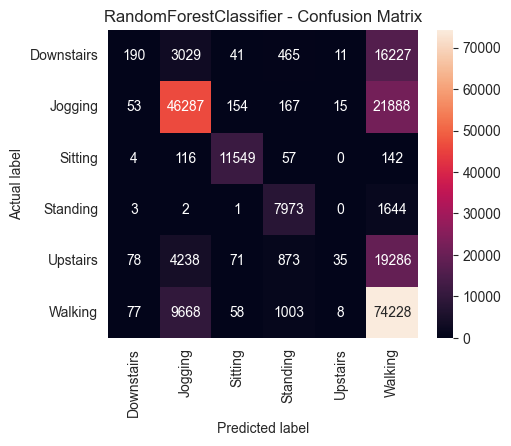

-----XGBClassifier-----
Accuracy: 0.6353
f1_score: 0.5716
Classification_report: 
               precision    recall  f1-score   support

           0       0.41      0.03      0.06     19963
           1       0.71      0.68      0.70     68564
           2       0.95      0.98      0.96     11868
           3       0.75      0.87      0.80      9623
           4       0.38      0.00      0.01     24581
           5       0.56      0.85      0.68     85042

    accuracy                           0.64    219641
   macro avg       0.63      0.57      0.53    219641
weighted avg       0.60      0.64      0.57    219641



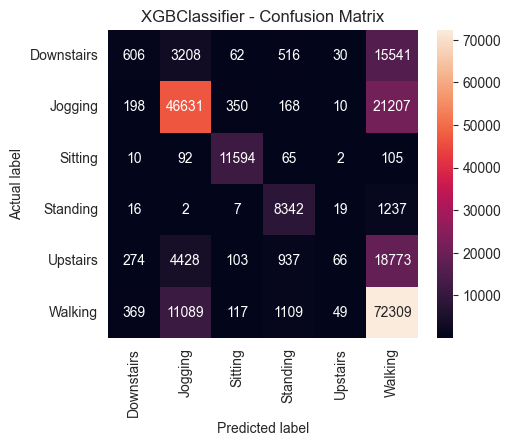

In [39]:
results = []
best_model = None
best_score = 0
best_name = None

for name,model in pipelines.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    cl = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f'-----{name}-----')
    print(f'Accuracy: {acc :.4f}')
    print(f'f1_score: {f1 :.4f}')
    print(f'Classification_report: \n {cl}')

    plt.figure(figsize = (5,4))
    sns.heatmap(cm, annot = True, fmt='d',xticklabels=le.classes_,yticklabels=le.classes_)
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted label')
    plt.ylabel('Actual label')
    plt.show()

    if f1 > best_score:
        best_model = model
        best_score = f1
        best_name = name

    results.append({
        'Model name': name,
        'Accuracy': acc,
        'F1 score': f1,
    })

In [40]:
summary = pd.DataFrame(results)
print(summary)

               Model name  Accuracy  F1 score
0  RandomForestClassifier  0.638597  0.571439
1           XGBClassifier  0.635346  0.571565


In [41]:
print(f'Best Model Name: {best_name}')
print(f'Best Score: {best_score}')

Best Model Name: XGBClassifier
Best Score: 0.5715647561705931


In [42]:
save_path = 'D:\All project set\Projects\ML Project\wisdm\wisdm_model.pkl'
joblib.dump(best_model,save_path,compress=3)

le_path = 'D:/All project set/Projects/ML Project/wisdm/label_encoder.pkl'
joblib.dump(le, le_path)

print(f'Save successfully')


Save successfully
